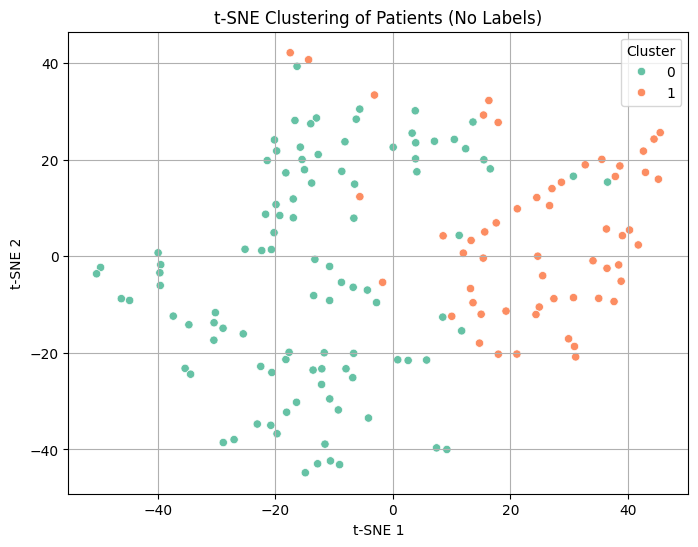

🔬 Top 10 genes by variance:
ITGA9      1.0
AEBP1      1.0
ACTR2      1.0
CXCR4      1.0
PTPN18     1.0
DLGAP4     1.0
SSFA2      1.0
FAM129A    1.0
HMGCR      1.0
ACOT2      1.0
dtype: float64

🧪 T-tests for top 10 genes between clusters:
ITGA9: p-value = 9.471e-08
AEBP1: p-value = 8.321e-08
ACTR2: p-value = 1.154e-03
CXCR4: p-value = 6.782e-13
PTPN18: p-value = 6.688e-06
DLGAP4: p-value = 8.004e-09
SSFA2: p-value = 1.764e-06
FAM129A: p-value = 8.952e-07
HMGCR: p-value = 1.985e-05
ACOT2: p-value = 5.397e-08


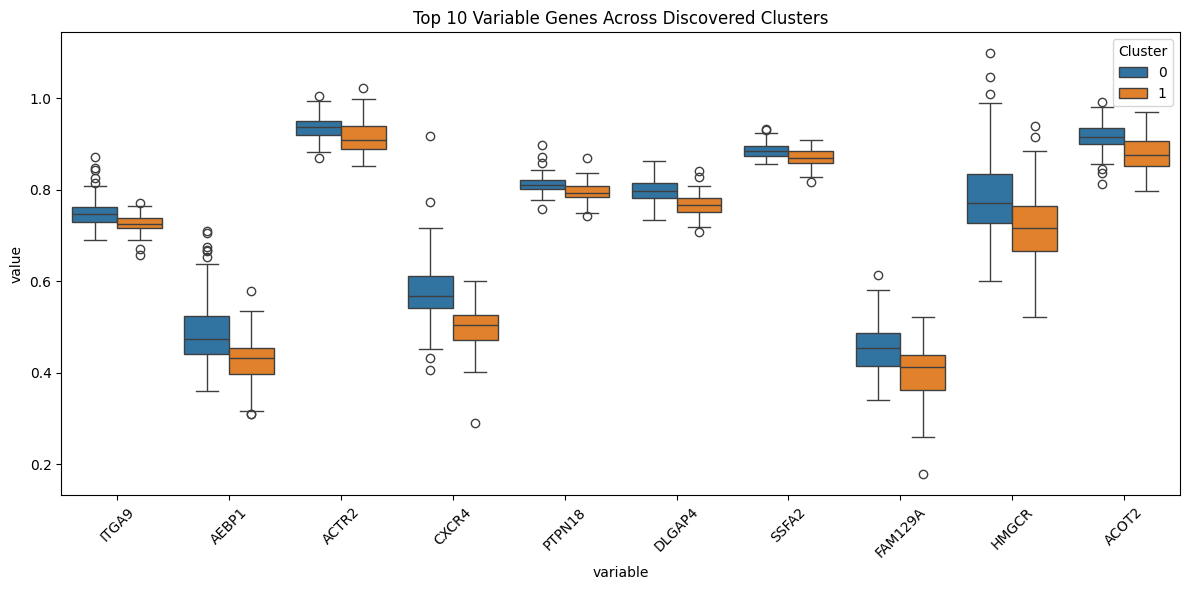

In [30]:
# Install dependencies
!pip install openpyxl

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel dataset
df = pd.read_excel("/content/GSE182060_dataset.xlsx")

# Drop non-numeric metadata
gene_df = df.select_dtypes(include='number').dropna(axis=1)

# Standardize gene values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gene_df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

# KMeans Clustering (e.g., into 2 groups)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=5, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['Cluster'], palette='Set2')
plt.title("t-SNE Clustering of Patients (No Labels)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

# Top genes by variance
gene_variance = pd.Series(np.var(X_scaled, axis=0), index=gene_df.columns)
top10_genes = gene_variance.sort_values(ascending=False).head(10)
print("🔬 Top 10 genes by variance:")
print(top10_genes)

# Statistical comparison between clusters for those genes
print("\n🧪 T-tests for top 10 genes between clusters:")
for gene in top10_genes.index:
    group0 = df[df['Cluster'] == 0][gene]
    group1 = df[df['Cluster'] == 1][gene]
    stat, p = ttest_ind(group0, group1, equal_var=False)
    print(f"{gene}: p-value = {p:.3e}")

# Plot top 10 gene distributions by cluster
melted_df = df[['Cluster'] + list(top10_genes.index)].melt(id_vars='Cluster')
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue='Cluster', data=melted_df)
plt.title("Top 10 Variable Genes Across Discovered Clusters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
